In [1]:
import cv2
import numpy as np
from visao import gravar_arquivo_arff, lbp, histograma_tons_cinza, distancia

In [2]:
import os

BASE_PATH = './grape_base/'
black_measles_imgs = os.listdir(BASE_PATH+'black_measles')
black_measles_imgs = [BASE_PATH+'black_measles/'+img for img in black_measles_imgs]

leaf_blight_imgs = os.listdir(BASE_PATH+'leaf_blight')
leaf_blight_imgs = [BASE_PATH+'leaf_blight/'+img for img in leaf_blight_imgs]

black_rot_imgs = os.listdir(BASE_PATH+'black_rot')
black_rot_imgs = [BASE_PATH+'black_rot/'+img for img in black_rot_imgs]

healthy_imgs = os.listdir(BASE_PATH+'healthy')
classes_dict = {}
healthy_imgs = [BASE_PATH+'healthy/'+img for img in healthy_imgs]

In [3]:
def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
    return np.sqrt(soma) 

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(healthy_imgs[0],0)

# Initiate SIFT detector
#orb = cv2.ORB_create() #ORB é a versão não patenteada
sift = cv2.xfeatures2d.SIFT_create()

# encontrando os pontos-de-interesse
kp = sift.detect(img,None)

# computando o vetor-de-característica para cada ponto dectado no passo anterior
kp, des = sift.compute(img, kp)

#desenhando os pontos na imagem
img2 = cv2.drawKeypoints(img, kp, None)

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics

K = 10
kmeans_model = KMeans(n_clusters=K).fit(des) #des são os vetores-de-características

palavras = np.array(kmeans_model.cluster_centers_)

print(palavras)

[[ 9.4         9.84       17.16       ...  1.8399982   3.7999992
  10.919999  ]
 [30.333334   74.53333    43.2        ...  0.79999924  1.666666
   7.2       ]
 [30.61111    62.27778    30.         ...  1.8333321   2.1111107
   7.9444447 ]
 ...
 [10.875      17.         12.749999   ...  4.0000005   3.8749995
   9.875     ]
 [ 7.1000004  12.800001   18.699999   ...  2.4         2.2999992
   3.5999994 ]
 [21.333334   17.5        19.833334   ... 49.333336   38.416668
  13.416666  ]]


In [6]:
#sift
def extrair_caracteristica(img):
    sift = cv2.xfeatures2d.SIFT_create()
    # encontrando os pontos-de-interesse
    kp = sift.detect(img,None)
    #print('Qtde Pontos Detectados: ', len(kp))
    # computando o vetor-de-característica para cada ponto dectado no passo anterior
    kp, des = sift.compute(img, kp)
    pontos_rotulados = []

    for ponto in des:
        min = 9999
        label = -1
        for i in range(len(palavras)):
            dist = distancia(ponto, palavras[i])
            if(dist < min):
                min = dist
                label = i
        pontos_rotulados.append(label)
    
    hist = np.zeros(10)

    for i in pontos_rotulados:
        hist[i] += 1
    
    return hist
    

In [7]:
img = cv2.imread(black_measles_imgs[2])
c = extrair_caracteristica(img)
print(c)

[ 35.   8.  31.  11.  21.  24. 118.  48.   9.  94.]


In [8]:
all_image_paths = [healthy_imgs, black_measles_imgs, leaf_blight_imgs, black_rot_imgs]

base_leaf_deseases = []
classes = []

#extraindo as características das imagens na base de dados
for i in range(len(all_image_paths)):
    for img_path in all_image_paths[i]:
        imagem = cv2.imread(img_path)
        caracteristica = extrair_caracteristica(imagem)
        classes.append(i)
        base_leaf_deseases.append((caracteristica, i))
    print('Ending class '+str(i))

gravar_arquivo_arff(base_leaf_deseases, classes) 

Ending class 0
Ending class 1
Ending class 2
Ending class 3
arquivo gravado


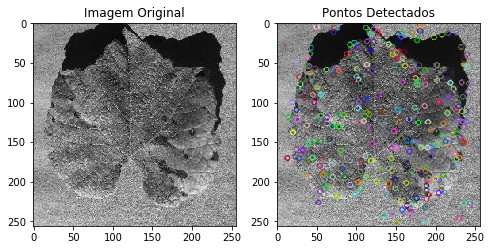

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(leaf_blight_imgs[2],0)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img,None)
kp, des = sift.compute(img, kp)
img2 = cv2.drawKeypoints(img, kp, None)

plt.figure(figsize=(8,8))
plt.gray()
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Pontos Detectados')
plt.imshow(img2)

plt.show()